# Pedro e o Lobo: Introdução ao Aprendizado por Reforço

Neste tutorial, vamos aprender como aplicar aprendizado por reforço a um problema de busca de caminhos. O cenário é inspirado no conto musical [Pedro e o Lobo](https://en.wikipedia.org/wiki/Peter_and_the_Wolf) do compositor russo [Sergei Prokofiev](https://en.wikipedia.org/wiki/Sergei_Prokofiev). É uma história sobre o jovem pioneiro Pedro, que corajosamente sai de casa para a clareira da floresta para perseguir um lobo. Vamos treinar algoritmos de aprendizado de máquina que ajudarão Pedro a explorar a área ao redor e construir um mapa de navegação otimizado.

Primeiro, vamos importar um conjunto de bibliotecas úteis:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## Visão Geral do Aprendizagem por Reforço

**Aprendizagem por Reforço** (RL) é uma técnica de aprendizagem que nos permite aprender o comportamento ideal de um **agente** em um determinado **ambiente** através da realização de muitos experimentos. Um agente neste ambiente deve ter algum **objetivo**, definido por uma **função de recompensa**.

## O Ambiente

Para simplificar, vamos considerar o mundo de Peter como um tabuleiro quadrado de tamanho `width` x `height`. Cada célula neste tabuleiro pode ser:
* **chão**, onde Peter e outras criaturas podem caminhar
* **água**, onde obviamente não se pode caminhar
* **uma árvore** ou **relva** - um lugar onde se pode descansar
* **uma maçã**, que representa algo que Peter ficaria feliz em encontrar para se alimentar
* **um lobo**, que é perigoso e deve ser evitado

Para trabalhar com o ambiente, vamos definir uma classe chamada `Board`. Para não sobrecarregar demasiado este notebook, movemos todo o código relacionado ao funcionamento do tabuleiro para um módulo separado chamado `rlboard`, que iremos importar agora. Pode consultar este módulo para obter mais detalhes sobre os aspectos internos da implementação.


Vamos agora criar um tabuleiro aleatório e ver como fica:


In [4]:
# code block 1

## Ações e Política

No nosso exemplo, o objetivo de Peter seria encontrar uma maçã, enquanto evita o lobo e outros obstáculos. Defina essas ações como um dicionário e associe-as a pares de alterações correspondentes de coordenadas.


In [5]:
# code block 2

A estratégia do nosso agente (Peter) é definida por uma chamada **política**. Vamos considerar a política mais simples chamada **caminhada aleatória**.

## Caminhada aleatória

Vamos primeiro resolver o nosso problema implementando uma estratégia de caminhada aleatória.


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## Função de Recompensa

Para tornar a nossa política mais inteligente, precisamos compreender quais movimentos são "melhores" do que outros.


In [8]:
#code block 5

## Q-Learning

Construa uma Q-Table, ou matriz multidimensional. Como o nosso tabuleiro tem dimensões `width` x `height`, podemos representar a Q-Table por um array numpy com a forma `width` x `height` x `len(actions)`:


In [9]:
# code block 6

Passe a Q-Table para a função `plot` para visualizar a tabela no tabuleiro:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## Essência do Q-Learning: Equação de Bellman e Algoritmo de Aprendizagem

Escreva um pseudocódigo para o nosso algoritmo de aprendizagem:

* Inicializar a Q-Table Q com números iguais para todos os estados e ações
* Definir a taxa de aprendizagem $\alpha\leftarrow 1$
* Repetir a simulação várias vezes
   1. Começar numa posição aleatória
   1. Repetir
        1. Selecionar uma ação $a$ no estado $s$
        2. Executar a ação, movendo-se para um novo estado $s'$
        3. Se encontrarmos uma condição de fim de jogo ou se o total de recompensas for muito baixo - sair da simulação  
        4. Calcular a recompensa $r$ no novo estado
        5. Atualizar a Função Q de acordo com a equação de Bellman: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. Atualizar a recompensa total e diminuir $\alpha$.

## Explorar vs. Explorar

A melhor abordagem é equilibrar entre exploração e exploração. À medida que aprendemos mais sobre o nosso ambiente, estaremos mais propensos a seguir o caminho ótimo, no entanto, escolhendo o caminho inexplorado de vez em quando.

## Implementação em Python

Agora estamos prontos para implementar o algoritmo de aprendizagem. Antes disso, também precisamos de uma função que converta números arbitrários na Q-Table num vetor de probabilidades para as ações correspondentes:


In [10]:
# code block 7

Adicionamos uma pequena quantidade de `eps` ao vetor original para evitar divisão por 0 no caso inicial, quando todos os componentes do vetor são idênticos.

O algoritmo de aprendizagem que iremos executar durante 5000 experiências, também chamadas de **épocas**:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

Após executar este algoritmo, a Q-Table deverá ser atualizada com valores que definem a atratividade de diferentes ações em cada etapa. Visualize a tabela aqui:


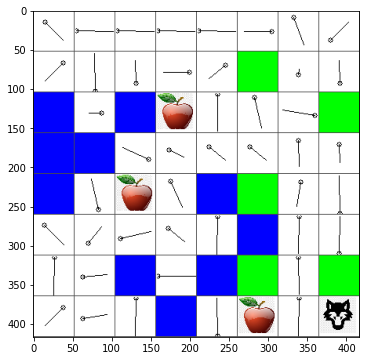

In [43]:
m.plot(Q)

## Verificar a Política

Como a Q-Table lista a "atratividade" de cada ação em cada estado, é bastante fácil utilizá-la para definir a navegação eficiente no nosso mundo. No caso mais simples, podemos simplesmente selecionar a ação correspondente ao valor mais alto na Q-Table:


In [13]:
# code block 9

2

Se tentar o código acima várias vezes, pode notar que, por vezes, ele simplesmente "fica preso", e é necessário pressionar o botão STOP no notebook para interrompê-lo.

> **Tarefa 1:** Modifique a função `walk` para limitar o comprimento máximo do caminho a um certo número de passos (por exemplo, 100), e observe o código acima retornar este valor ocasionalmente.

> **Tarefa 2:** Modifique a função `walk` para que não volte aos locais onde já esteve anteriormente. Isto evitará que o `walk` entre em ciclos, no entanto, o agente ainda pode acabar "encurralado" num local do qual não consegue escapar.


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


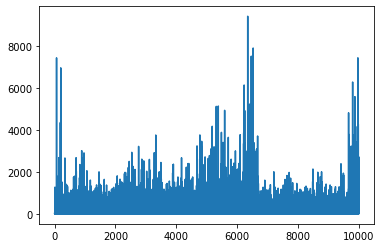

In [57]:
plt.plot(lpath)

## Exercício
## Um mundo mais realista de Pedro e o Lobo




---

**Aviso Legal**:  
Este documento foi traduzido utilizando o serviço de tradução por IA [Co-op Translator](https://github.com/Azure/co-op-translator). Embora nos esforcemos para garantir a precisão, é importante ter em conta que traduções automáticas podem conter erros ou imprecisões. O documento original na sua língua nativa deve ser considerado a fonte autoritária. Para informações críticas, recomenda-se a tradução profissional realizada por humanos. Não nos responsabilizamos por quaisquer mal-entendidos ou interpretações incorretas decorrentes da utilização desta tradução.
